In [2]:
%load_ext jupyter_black

In [3]:
import pandas as pd
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt


# standard millibar pressure levels
pressure_levels = np.array([1013.25, *range(1000, 25 - 11, -25)], dtype=float)
pressure_levels

array([1013.25, 1000.  ,  975.  ,  950.  ,  925.  ,  900.  ,  875.  ,
        850.  ,  825.  ,  800.  ,  775.  ,  750.  ,  725.  ,  700.  ,
        675.  ,  650.  ,  625.  ,  600.  ,  575.  ,  550.  ,  525.  ,
        500.  ,  475.  ,  450.  ,  425.  ,  400.  ,  375.  ,  350.  ,
        325.  ,  300.  ,  275.  ,  250.  ,  225.  ,  200.  ,  175.  ,
        150.  ,  125.  ,  100.  ,   75.  ,   50.  ,   25.  ])

In [4]:
logp = np.log(pressure_levels)
logp

array([6.92091827, 6.90775528, 6.88243747, 6.85646198, 6.82979374,
       6.80239476, 6.77422389, 6.74523635, 6.71538339, 6.68461173,
       6.65286303, 6.62007321, 6.58617165, 6.55108034, 6.51471269,
       6.47697236, 6.43775165, 6.39692966, 6.35437004, 6.30991828,
       6.26339826, 6.2146081 , 6.1633148 , 6.10924758, 6.05208917,
       5.99146455, 5.92692603, 5.85793315, 5.78382518, 5.70378247,
       5.6167711 , 5.52146092, 5.4161004 , 5.29831737, 5.16478597,
       5.01063529, 4.82831374, 4.60517019, 4.31748811, 3.91202301,
       3.21887582])

In [5]:
np.log([1013.25, 1])

array([6.92091827, 0.        ])

In [6]:
def normalize(x: NDArray[np.number], keepdims: bool = True) -> NDArray[np.float_]:
    return (x - x.min(keepdims=keepdims)) / (x.max(keepdims=keepdims) - x.min(keepdims=keepdims))


norm = normalize(logp)
norm

array([1.        , 0.9964444 , 0.98960552, 0.98258899, 0.97538534,
       0.96798429, 0.96037474, 0.9525446 , 0.94448068, 0.9361686 ,
       0.92759261, 0.91873538, 0.90957786, 0.90009895, 0.89027528,
       0.88008082, 0.86948647, 0.85845959, 0.84696334, 0.83495597,
       0.82238993, 0.80921068, 0.79535527, 0.78075057, 0.76531088,
       0.74893488, 0.73150166, 0.71286523, 0.6928471 , 0.67122587,
       0.64772225, 0.62197696, 0.59351685, 0.56170116, 0.52563151,
       0.48399215, 0.43474324, 0.37446744, 0.29675843, 0.18723372,
       0.        ])

In [7]:
def scale(x: NDArray[np.number], rate: float = 1.0) -> NDArray[np.float_]:
    return normalize(x) * rate + 1


scale(np.log(pressure_levels))

array([2.        , 1.9964444 , 1.98960552, 1.98258899, 1.97538534,
       1.96798429, 1.96037474, 1.9525446 , 1.94448068, 1.9361686 ,
       1.92759261, 1.91873538, 1.90957786, 1.90009895, 1.89027528,
       1.88008082, 1.86948647, 1.85845959, 1.84696334, 1.83495597,
       1.82238993, 1.80921068, 1.79535527, 1.78075057, 1.76531088,
       1.74893488, 1.73150166, 1.71286523, 1.6928471 , 1.67122587,
       1.64772225, 1.62197696, 1.59351685, 1.56170116, 1.52563151,
       1.48399215, 1.43474324, 1.37446744, 1.29675843, 1.18723372,
       1.        ])

In [8]:
def create_scale(p, rate: float = 1.0) -> NDArray[np.float_]:
    s = scale(np.log(pressure_levels), rate=rate)[::-1]
    return s[np.isin(pressure_levels, p)]


lvls = [1013.25, 925, 850, 700, 500, 300]
x = np.c_[lvls, create_scale(lvls, 2.5) * 30]
x = np.stack([lvls, create_scale(lvls, 2.5) * 30], axis=1)

,resolution,extent
hPa,,
300.0,36.952577,2956.206151
500.0,33.810849,2704.867923
700.0,29.232446,2338.595685
850.0,23.563794,1885.103487
1000.0,9.521265,761.701162


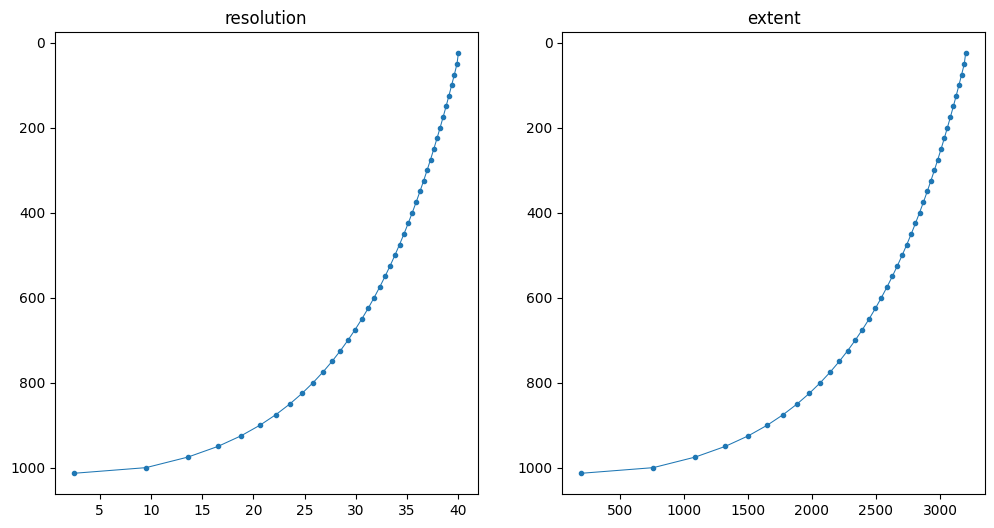

In [15]:
URMA_GRID_RESOLUTION = 2.5  # km / px
ERA5_GRID_RESOLUTION = 30.0  # km / px
MESOSCALE_BETA = 200.0  # km
RATE = ERA5_GRID_RESOLUTION / 2

resolution = scale(np.log(pressure_levels), rate=RATE)[::-1] * URMA_GRID_RESOLUTION
extent = scale(np.log(pressure_levels), rate=RATE)[::-1] * MESOSCALE_BETA

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.invert_yaxis()
ax2.invert_yaxis()
Y = pressure_levels


ax1.plot(resolution, Y, linestyle="-", linewidth=0.75, marker=".")
ax1.set_title("resolution")


ax2.plot(extent, Y, linestyle="-", linewidth=0.75, marker=".")
ax2.set_title("extent")


df = pd.DataFrame({"resolution": resolution, "extent": extent}, index=pd.Index(pressure_levels, name="hPa"))
df.loc[[1000, 850, 700, 500, 300]].sort_index()

In [10]:
xd, yd = 200, 175
s = scale(np.log(pressure_levels), rate=RATE)[np.newaxis, ::-1]
x, y = s * np.array([[xd], [yd]])
x, y

(array([ 200.        ,  761.70116227, 1090.27527881, 1323.40232454,
        1504.22970961, 1651.97644108, 1776.89452262, 1885.10348681,
        1980.55055762, 2065.93087188, 2143.16676098, 2213.67760335,
        2278.54129059, 2338.59568489, 2394.50498841, 2446.80464908,
        2495.93262867, 2542.25171989, 2586.06582154, 2627.63203414,
        2667.16980143, 2704.86792325, 2740.89000832, 2775.37876562,
        2808.45941921, 2840.24245286, 2870.82583643, 2900.29684716,
        2928.73357125, 2956.20615068, 2982.77782566, 3008.50581135,
        3033.44203979, 3057.63379093, 3081.12423223, 3103.95288216,
        3126.15601026, 3147.76698381, 3168.8165694 , 3189.33319641,
        3200.        ]),
 array([ 175.        ,  666.48851699,  953.99086896, 1157.97703397,
        1316.2009959 , 1445.47938594, 1554.7827073 , 1649.46555096,
        1732.98173792, 1807.68951289, 1875.27091586, 1936.96790293,
        1993.72362927, 2046.27122428, 2095.19186486, 2140.95406794,
        2183.94105008, 

In [11]:
pressure_levels

array([1013.25, 1000.  ,  975.  ,  950.  ,  925.  ,  900.  ,  875.  ,
        850.  ,  825.  ,  800.  ,  775.  ,  750.  ,  725.  ,  700.  ,
        675.  ,  650.  ,  625.  ,  600.  ,  575.  ,  550.  ,  525.  ,
        500.  ,  475.  ,  450.  ,  425.  ,  400.  ,  375.  ,  350.  ,
        325.  ,  300.  ,  275.  ,  250.  ,  225.  ,  200.  ,  175.  ,
        150.  ,  125.  ,  100.  ,   75.  ,   50.  ,   25.  ])

In [12]:
from typing import Iterable

P0 = 1013.25


def scale(x: NDArray[np.number], rate: float = 1.0) -> NDArray[np.float_]:
    return normalize(x) * rate + 1


def inverse_log_scale(p: Iterable[float], *, rate: float = 1.0):
    p = np.array(sorted({P0, *p, 25.0}, reverse=True), dtype=float)
    p = scale(np.log(p), rate=rate)[np.newaxis, ::-1]
    return p


def mesoscale(
    dx: float = 200.0, dy: float | None = None, p: Iterable[float] | None = None, *, rate: float = 1.0
) -> tuple[NDArray[np.float_], NDArray[np.float_]]:
    p = p or range(1000, 25 - 1, -50)
    if dy is None:
        dy = dx
    x, y = inverse_log_scale(p, rate=rate) * np.array([[dx], [dy]])
    return x, y


x, y = mesoscale(200, 175, rate=RATE)


x, y

(array([ 200.        ,  761.70116227, 1323.40232454, 1651.97644108,
        1885.10348681, 2065.93087188, 2213.67760335, 2338.59568489,
        2446.80464908, 2542.25171989, 2627.63203414, 2704.86792325,
        2775.37876562, 2840.24245286, 2900.29684716, 2956.20615068,
        3008.50581135, 3057.63379093, 3103.95288216, 3147.76698381,
        3189.33319641, 3200.        ]),
 array([ 175.        ,  666.48851699, 1157.97703397, 1445.47938594,
        1649.46555096, 1807.68951289, 1936.96790293, 2046.27122428,
        2140.95406794, 2224.4702549 , 2299.17802988, 2366.75943284,
        2428.45641992, 2485.21214625, 2537.75974127, 2586.68038185,
        2632.44258493, 2675.42956707, 2715.95877189, 2754.29611083,
        2790.66654686, 2800.        ]))

In [13]:
class Mesoscale:
    def __init__(
        self,
        dx: float = 200.0,
        dy: float | None = None,
        km_px: float = URMA_GRID_RESOLUTION,
        *,
        pressure: list[float],
        rate: float = 1.0,
    ) -> None:
        self.p = p = sort_unique(pressure)[::-1]
        self._scale = scale = mesoscale(rate=rate)[np.newaxis, np.isin(STP, p)]
        self.dx, self.dy = scale * np.array([[dx], [dy or dx]])

    def to_pandas(self) -> pd.DataFrame:
        return pd.DataFrame(
            {
                "dx": self.dx,
                "dy": self.dy,
                "px": self.dx / URMA_GRID_RESOLUTION,
                "py": self.dy / URMA_GRID_RESOLUTION,
            },
            index=pd.Index(self.p, name="hPa"),
        ).sort_index()

    def __repr__(self) -> str:
        f = lambda x: np.array2string(
            x,
            prefix="aaaaa",
            separator=" ",
            max_line_width=20,
            precision=2,
            floatmode="fixed",
        )
        return f"p:\n{f(self.p)} hPa\ndx:\n  {f(self.dx)} km\ndy:{f(self.dy)} km"